In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from IPython.display import display
import numpy as np
# Using Client Credentials for authorization
client_credentials_manager = SpotifyClientCredentials(client_id="f2d11bfce2cf4bae8e096454ca4299ed",client_secret="0192b251aff04567a49d33d83287a254")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
# get access token for spotify
token = client_credentials_manager.get_access_token()

In [2]:
token = client_credentials_manager.get_access_token()
tracks = ["spotify:track:7BKLCZ1jbUBVqRi2FVlTVw"]
track = "7BKLCZ1jbUBVqRi2FVlTVw"
track_info = sp.tracks(tracks)
track_info1 = track_info['tracks'][0]

In [3]:
artist_uri = (track_info1['artists'][0]['uri'])
artist_name = (track_info1['artists'][0]['name'])
song_name = (track_info1['name'])
song_popularity = (track_info1['popularity'])

In [4]:
artist = sp.artist(artist_uri)
artist_popularity = artist['popularity']
artist_followers =(artist['followers']['total'])

In [5]:
audio_analysis = sp.audio_analysis(track)

In [6]:
audio_section_data = audio_analysis['sections']
audio_segment_data = audio_analysis['segments']

In [10]:
display(audio_analysis['sections'][0:3])

[{'start': 0.0,
  'duration': 10.64051,
  'confidence': 1.0,
  'loudness': -20.173,
  'tempo': 95.149,
  'tempo_confidence': 0.411,
  'key': 8,
  'key_confidence': 0.321,
  'mode': 1,
  'mode_confidence': 0.673,
  'time_signature': 4,
  'time_signature_confidence': 1.0},
 {'start': 10.64051,
  'duration': 41.373,
  'confidence': 0.864,
  'loudness': -7.842,
  'tempo': 95.002,
  'tempo_confidence': 0.735,
  'key': 8,
  'key_confidence': 0.589,
  'mode': 1,
  'mode_confidence': 0.539,
  'time_signature': 4,
  'time_signature_confidence': 1.0},
 {'start': 52.01351,
  'duration': 16.41572,
  'confidence': 0.478,
  'loudness': -6.227,
  'tempo': 95.129,
  'tempo_confidence': 0.518,
  'key': 8,
  'key_confidence': 0.435,
  'mode': 1,
  'mode_confidence': 0.486,
  'time_signature': 4,
  'time_signature_confidence': 1.0}]

In [33]:
weight = []
confidence = []
loudness = []
tempo = []
tempo_confidence = []
key = []
key_confidence = []
mode = []
mode_confidence = []
time_signature = []
time_signature_confidence = []
for item in range(0,len(audio_analysis['sections'])):
    weight.append(audio_analysis['sections'][item]['duration'])
    loudness.append(audio_analysis['sections'][item]['loudness'])
loudness_average = np.average(loudness,weights=weight)
x = (np.array(weight)*np.array(loudness))
y = np.sum(weight)
z = np.average(weight)
balancing_coeff = np.array(weight)/z 
p = np.average(n)
print(loudness_average)
print(np.sum(x)/y)
print(p)
balanced_data = []
balanced_data.append(weight)
print(balanced_data)

-7.5297324200277576
-7.5297324200277576
-7.529732420027758
[[10.64051, 41.373, 16.41572, 23.99372, 19.5762, 20.22429, 17.67881, 43.58777, 11.37035, 30.94246, 9.15717]]


In [11]:
display(audio_analysis['segments'][0:3])

[{'start': 0.0,
  'duration': 0.17914,
  'confidence': 0.0,
  'loudness_start': -60.0,
  'loudness_max_time': 0.0,
  'loudness_max': -60.0,
  'pitches': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  'timbre': [0.0,
   171.13,
   9.469,
   -28.48,
   57.491,
   -50.067,
   14.833,
   5.359,
   -27.228,
   0.973,
   -10.64,
   -7.228]},
 {'start': 0.17914,
  'duration': 0.55787,
  'confidence': 1.0,
  'loudness_start': -60.0,
  'loudness_max_time': 0.11318,
  'loudness_max': -27.246,
  'pitches': [0.037,
   0.203,
   0.039,
   1.0,
   0.158,
   0.261,
   0.025,
   0.023,
   0.489,
   0.037,
   0.023,
   0.016],
  'timbre': [29.762,
   -275.375,
   -39.099,
   -26.507,
   68.029,
   -15.841,
   -19.664,
   22.301,
   -24.549,
   2.972,
   23.996,
   1.967]},
 {'start': 0.73701,
  'duration': 0.20322,
  'confidence': 0.128,
  'loudness_start': -34.196,
  'loudness_max_time': 0.03555,
  'loudness_max': -31.405,
  'pitches': [0.167,
   0.579,
   0.078,
   0.61,
   0.159,
  

Text(0.5,1,'Time vs Confidence for Closer by The Chainsmokers')

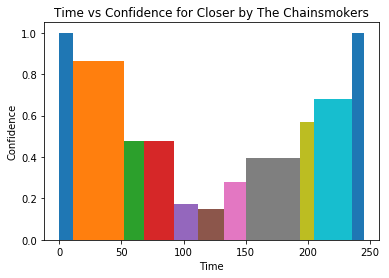

In [82]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(0,len(audio_section_data)):
    confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['confidence'],width =audio_section_data[i]['duration'])               

plt.xlabel("Time")
plt.ylabel("Confidence")
plt.title("Time vs Confidence for " + str(song_name)+" by " + str(artist_name))

Text(0.5,1,'Time vs Loudness for Closer by The Chainsmokers')

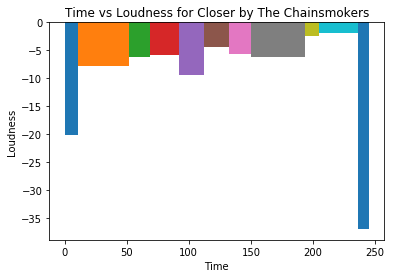

In [83]:
for i in range(0,len(audio_section_data)):
    loudness_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['loudness'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Loudness")
plt.title("Time vs Loudness for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Tempo for Closer by The Chainsmokers')

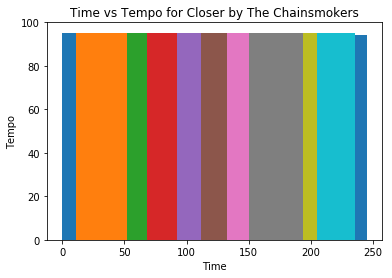

In [84]:
for i in range(0,len(audio_section_data)):
    tempo_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['tempo'],width =audio_section_data[i]['duration'])
    
plt.xlabel("Time")
plt.ylabel("Tempo")
plt.title("Time vs Tempo for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Tempo Confidence for Closer by The Chainsmokers')

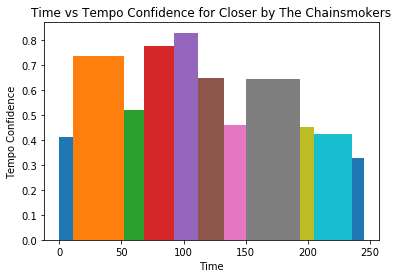

In [85]:
for i in range(0,len(audio_section_data)):
    tempo_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['tempo_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Tempo Confidence")
plt.title("Time vs Tempo Confidence for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Key for Closer by The Chainsmokers')

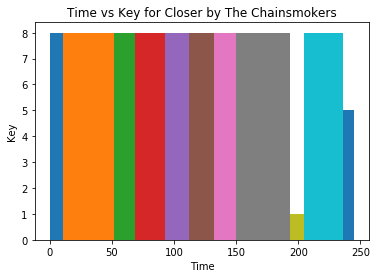

In [86]:
for i in range(0,len(audio_section_data)):
    key_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['key'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Key")
plt.title("Time vs Key for " + str(song_name)+" by " + str(artist_name))
   

Text(0.5,1,'Time vs Key Confidence for Closer by The Chainsmokers')

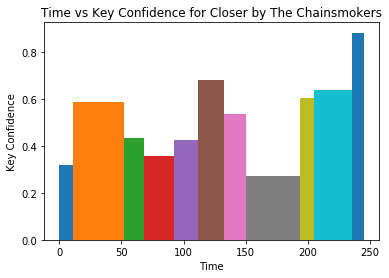

In [87]:
for i in range(0,len(audio_section_data)):
    key_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['key_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Key Confidence")
plt.title("Time vs Key Confidence for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Mode for Closer by The Chainsmokers')

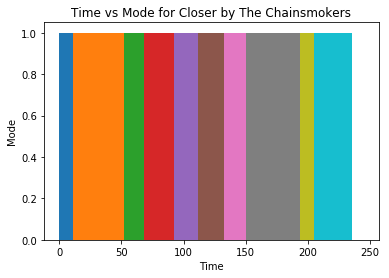

In [88]:
for i in range(0,len(audio_section_data)):
    mode_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['mode'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Mode")
plt.title("Time vs Mode for " + str(song_name)+" by " + str(artist_name))


Text(0.5,1,'Time vs Mode Confidence for Closer by The Chainsmokers')

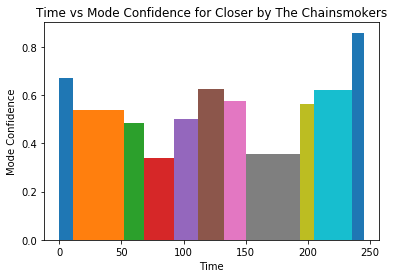

In [89]:
for i in range(0,len(audio_section_data)): 
    mode_confidence_plt = plt.bar((audio_section_data[i]['start']+(audio_section_data[i]['duration']/2)), audio_section_data[i]['mode_confidence'],width =audio_section_data[i]['duration'])

plt.xlabel("Time")
plt.ylabel("Mode Confidence")
plt.title("Time vs Mode Confidence for " + str(song_name)+" by " + str(artist_name))


In [46]:
#playlist named "mint" in spotify
playlist = sp.user_playlist(user='spotify',playlist_id="37i9dQZF1DX4dyzvuaRJ0n")


In [51]:
display(playlist)

{'collaborative': False,
 'description': "The dance music condition with Marshmello+SVDDEN DEATH's latest",
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX4dyzvuaRJ0n'},
 'followers': {'href': None, 'total': 5419596},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4dyzvuaRJ0n',
 'id': '37i9dQZF1DX4dyzvuaRJ0n',
 'images': [{'height': None,
   'url': 'https://pl.scdn.co/images/pl/default/884e7136a9181335fc8a7427d489a58325e3d77e',
   'width': None}],
 'name': 'mint',
 'owner': {'display_name': 'Spotify',
  'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
  'href': 'https://api.spotify.com/v1/users/spotify',
  'id': 'spotify',
  'type': 'user',
  'uri': 'spotify:user:spotify'},
 'primary_color': '#efefef',
 'public': True,
 'snapshot_id': 'MTU0OTYwMjA2MCwwMDAwMDM1OTAwMDAwMTY4Y2I3YWY4NjIwMDAwMDE2OGM4ZjY3NDZm',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4dyzvuaRJ0n/tracks?offset=0&limit=100',
  'items': [

In [53]:
playlist_track = playlist['tracks']['items']
display(playlist_track[0])

{'added_at': '2019-02-08T05:01:00Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
  'href': 'https://api.spotify.com/v1/users/',
  'id': '',
  'type': 'user',
  'uri': 'spotify:user:'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'single',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/64KEffDW9EtZ1y2vBYgq8T'},
     'href': 'https://api.spotify.com/v1/artists/64KEffDW9EtZ1y2vBYgq8T',
     'id': '64KEffDW9EtZ1y2vBYgq8T',
     'name': 'Marshmello',
     'type': 'artist',
     'uri': 'spotify:artist:64KEffDW9EtZ1y2vBYgq8T'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/2u01kCKA5wDvvztuH8lyT0'},
     'href': 'https://api.spotify.com/v1/artists/2u01kCKA5wDvvztuH8lyT0',
     'id': '2u01kCKA5wDvvztuH8lyT0',
     'name': 'SVDDEN DEATH',
     'type': 'artist',
     'uri': 'spotify:artist:2u01kCKA5wDvvztuH8lyT0'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
 

In [40]:
data = []
for item in range(0,len(playlist_track)):
    track_id = playlist_track[item]['track']['id']
    data.append(track_id)
    

In [43]:
print (data)

['0e9yz3Fz7Nn6I5E4XBP8no', '4Tvw0lweq9l2JPQKFbpbBQ', '6FHZSp0YFaEFVAbssG71Bt', '5itOtNx0WxtJmi1TQ3RuRd', '0M0FvSNRZmDz0Z769rewlI', '0CALOqrkXAE7WB2nyIATLk', '1rCcsYnmqbMYdkG7kS9GC5', '05LvE6ySn6hEcHdAJ7N19z', '1nufXiTCTTAeJfO9hLHvO8', '6JhJ3Qiw7sWE74MmSTbwkK', '5RugEn59RTnWE4IM4uBaC9', '6EXl6ZF6rXm6qCsKeizJ1b', '7g2WfNLkwj6QeYmXleHUvi', '6FZeriWMXd5ciTN7GvC0od', '2gtiPRRrYyeHrkuvDnDIR5', '7gq9Mo03Zr417T2C5sgR03', '5sdb5pMhcK44SSLsj1moUh', '18vGqlZqxpAwlepFrqIkOG', '1CnMonW2jPjo4OvGEw6esf', '6TR0FGw4zhlGbQALN065AI', '508lUjbGcPrL0CfvHC7UvI', '29R1IMTTbDDA3VNlk6UEW5', '3dxvjyC8LJ5kH2iFqfne8j', '5cNLc9PNhzbGC3DKZeWGSL', '5ElvxQOgTTUTjVfa1uhhFv', '7ew2yVscivQRemp0MPPWtS', '6lXPxNJVBoIRUitMJZw64Y', '0Szx8eb4f6dcD1ymSkhUVi', '4dHuU8wSvtek4sxRGoDLpf', '7rEOUR7AmXcgd32WG5duJh', '4ut5G4rgB1ClpMTMfjoIuy', '1kpP1Y5sLWxNVE6qH0GYqH', '2L93hpsnJ8scBHIQFZzh1b', '4gxukDJiwApNEgVIh4pHgT', '79ep1XDpYKg0goDd3g5uPT', '1LwVrOwwPJPU5lVuQDPnGA', '2QOSMLaEJkkeezSMZ75yB8', '4M8x1TR36VMQMFMbGCdoyA', '5ql2mP9FUh